In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from scipy.stats import norm

In [3]:
file_path = r"G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\DATA_30_08_2024.xlsx"
data = pd.read_excel(file_path)

In [4]:
data

,ID_Rota,Energy_Estimated(%),Distance_Traveled(km),Avg_Temperature(C),Air_Humidity(%),Dist_Cluster_Clients(km),Route_Time(h),Total_Weighted_Mass(ton),Stdv_Altitudes(m),Wind_Speed(m/s),Avg_Speed(m/s),Number_Deliveries,Rain(mm),Max_Temp(C),Real_Energy_Expenditure(%)
0,20230901_RHQ2H04,41.716498,40.4,22.144429,52.796897,14.067360,3.185833,8.094501,7.352432,1.495487,3.524209,10,0.000000,27.5,41.2
1,20230902_RHS6B08,47.357887,49.6,22.191493,67.361194,7.806090,2.211111,9.206331,8.139739,2.044776,6.244209,8,0.000000,29.6,41.6
2,20230902_RHS6F90,54.828160,50.1,23.431280,62.676540,15.033330,3.123611,8.473027,20.839832,2.096801,4.455477,13,0.000000,29.6,46.4
3,20230902_RHT4G96,45.270473,54.3,19.594087,76.893316,19.882506,3.283333,7.848595,10.572484,1.692545,4.597407,9,0.000000,24.0,38.0
4,20230904_RHQ2H05,70.687503,57.8,27.653575,51.407254,18.174622,3.598056,9.276940,21.626044,3.153472,4.485942,11,0.000000,30.9,52.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,20240215_RHS6B06,44.577909,41.9,20.597115,88.774038,1.555601,2.258611,9.974098,16.337546,2.152644,5.198889,8,0.083173,22.3,36.8
173,20240220_RHS6F91,44.204194,51.8,21.943542,83.979167,12.778484,2.440278,9.663950,7.199588,1.208125,5.905980,14,0.120833,23.8,37.2
174,20240222_RHQ2H03,51.895367,58.9,24.058857,73.000000,11.092253,2.813611,8.282822,23.873651,1.963810,5.817566,12,0.000000,29.0,53.2
175,20240226_RHS6F92,59.709741,54.6,23.718381,75.708263,8.025749,3.442500,10.503930,8.306538,1.892749,4.403178,8,0.000000,26.5,44.4


In [7]:
X = data[['Energy_Estimated(%)']]
y = data['Real_Energy_Expenditure(%)']

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()

residuos = results.resid

print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     Real_Energy_Expenditure(%)   R-squared:                       0.699
Model:                                    OLS   Adj. R-squared:                  0.697
Method:                         Least Squares   F-statistic:                     405.6
Date:                        Wed, 04 Sep 2024   Prob (F-statistic):           1.92e-47
Time:                                09:58:57   Log-Likelihood:                -538.10
No. Observations:                         177   AIC:                             1080.
Df Residuals:                             175   BIC:                             1087.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [10]:
y_pred = results.predict(X)

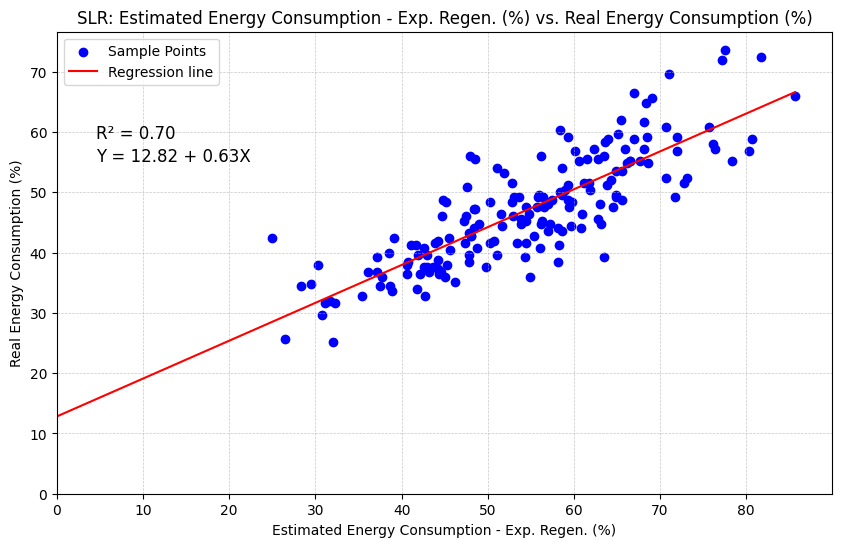

In [11]:
intercept, slope = results.params

r_squared = results.rsquared

x_fit = np.linspace(0, data['Energy_Estimated(%)'].max(), 100)
y_fit = intercept + slope * x_fit

plt.figure(figsize=(10, 6))
plt.scatter(data['Energy_Estimated(%)'], data['Real_Energy_Expenditure(%)'], color='blue', label='Sample Points')

plt.plot(x_fit, y_fit, color='red', label='Regression line')

plt.xlabel('Estimated Energy Consumption - Exp. Regen. (%)')
plt.ylabel('Real Energy Consumption (%)')
plt.title('SLR: Estimated Energy Consumption - Exp. Regen. (%) vs. Real Energy Consumption (%)')

plt.xlim(left=0)
plt.ylim(bottom=0)

equation = f'Y = {intercept:.2f} + {slope:.2f}X'
r_squared_text = f'R² = {r_squared:.2f}'
plt.text(0.05, 0.75, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.80, r_squared_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend()

plt.show()

In [22]:
residuos = pd.Series(residuos)
residuos.replace([np.inf, -np.inf], np.nan, inplace=True)

residuos = residuos.dropna()

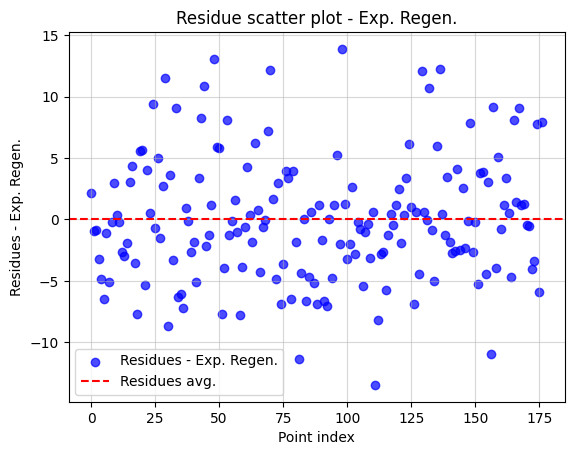

In [27]:
media_residuos = np.mean(residuos)

plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.7, label='Residues - Exp. Regen.')
plt.axhline(y=media_residuos, color='red', linestyle='--', label='Residues avg.')
plt.xlabel('Point index')
plt.ylabel('Residues - Exp. Regen.')
plt.title('Residue scatter plot - Exp. Regen.')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

C:\Users\duart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


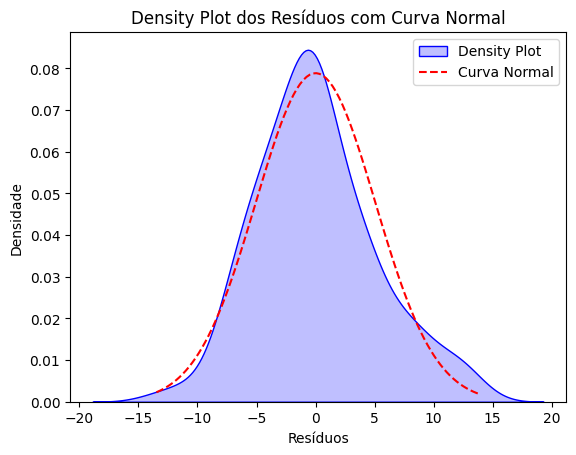

In [28]:
mean = np.mean(residuos)
std = np.std(residuos)

sns.kdeplot(residuos, fill=True, color='blue', label='Density Plot')

x_values = np.linspace(min(residuos), max(residuos), 100)

plt.plot(x_values, norm.pdf(x_values, mean, std), color='red', linestyle='dashed', label='Curva Normal')

plt.title('Density Plot dos Resíduos com Curva Normal')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')

plt.legend()

plt.show()

In [31]:
df = pd.concat([y_pred, y, residuos], axis=1)
df.columns = ['y_pred', 'y', 'Resíduos']

df

,y_pred,y,Resíduos
0,39.023916,41.2,2.176084
1,42.566862,41.6,-0.966862
2,47.258398,46.4,-0.858398
3,41.255909,38.0,-3.255909
4,57.218498,52.4,-4.818498
5,44.103407,37.6,-6.503407
6,55.877563,54.8,-1.077563
7,39.081603,34.0,-5.081603
8,47.820502,47.6,-0.220502
9,54.261355,57.2,2.938645


In [32]:
# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print("Estatística de teste:", shapiro_test[0])
print("Valor-p:", shapiro_test[1])

Estatística de teste: 0.9814675450325012
Valor-p: 0.018628690391778946


In [34]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Suponha que você tenha ajustado um modelo de regressão e tenha os resíduos e as variáveis explicativas
# Substitua 'residuos' pelos seus resíduos e 'X' pelas suas variáveis explicativas

# Realiza o teste de Breusch-Pagan/Cook-Weisberg
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X)

# Imprime os resultados
print("Estatística LM:", lm)
print("Valor-p LM:", lm_p_value)
print("Estatística F:", fvalue)
print("Valor-p F:", f_p_value)

Estatística LM: 4.234817177478919
Valor-p LM: 0.039602888588626796
Estatística F: 4.289596977535252
Valor-p F: 0.03981382452659804


In [37]:
from scipy.stats import norm

# Calcula o teste de Durbin-Watson
durbin_watson_test = sm.stats.stattools.durbin_watson(residuos)

# Imprime o resultado
print("Estatística de Durbin-Watson:", durbin_watson_test)

nobs = len(residuos)
nvars = 1

# Calculando o valor crítico DW
d_critico = sm.stats.stattools.durbin_watson(residuos)

# Calculando DL, DU, 4-DL e 4-DU
DL = 1.521 - 1.25 * (nvars / nobs)
DU = 1.521 + 1.25 * (nvars / nobs)
quatro_DL = 4.0 - DL
quatro_DU = 4.0 - DU

# Imprimindo os resultados
print("DL:", DL)
print("DU:", DU)
print("4-DL:", quatro_DL)
print("4-DU:", quatro_DU)

Estatística de Durbin-Watson: 1.9609415502714997
DL: 1.5139378531073446
DU: 1.5280621468926552
4-DL: 2.4860621468926554
4-DU: 2.471937853107345


In [38]:
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"MAPE: {mape:.2f}%")

MAPE: 8.37%
